Challenge : Artificial Intelligence Course in Engineering Physics

### **Predict Fraud Insurance Claims using Machine Learning - Supervised Learning**

Author : <br>
   <span style="color:green">&#9881;</span> Nova Zidane Ibrahim<br>
   <span style="color:green">&#9881;</span> Muhammad Luqman Al Helmy<br>
   <span style="color:green">&#9881;</span> Siti Annisa Aulia<br>

### **1. Introduction**
<b>Problem Statement:</b><br>
Insurance fraud is an illegal and unethical activity carried out systematically for financial benefit. It is a critical problem for insurance companies as it causes unnecessary spending of billions of dollars annually [(Shah etc., 2021)](https://www.irjet.net/archives/V8/i4/IRJET-V8I4577.pdf), [(Phadke etc, 2021)](https://www.irjet.net/archives/V8/i4/IRJET-V8I4474.pdf). This phenomenon is still not handled optimally. The current identification process still uses a traditional approach that takes a long time and is inadequate. Therefore, insurance companies need more effective ways to solve this problem. One solution is the application of machine learning in its detection.</br>

<b>Objective</b><br>
Build a machine learning model to detect wether a insurance claim is Fraud or Not.</br>

<b>Data Source Description</b></br>
The data used in this study are secondary data taken from Kaggle with the title Auto Insurance Claims Data made by B. Shah. You can access data source [Here](https://www.kaggle.com/datasets/buntyshah/auto-insurance-claims-data).</br>

No | Variable | Data Type | Amount of Unique Value
---|----------|-----------|-----------------------
1  | months_as_customer | int64 | 391
2  | age | int64 | 46
3  | policy_number | int64 | 1000
4  | policy_bind_date | object | 951
5  | policy_state | object | 3
6  | policy_csl | object | 3
7  | policy_deductable | int64 | 3
8  | policy_annual_premium | float64 | 991
9  | umbrella_limit | int64 | 11
10 | insured_zip | int64 | 995
11 | insured_sex | object | 2
12 | insured_education_level | object | 7
13 | insured_occupation | object | 14
14 | insured_hobbies | object | 20
15 | insured_relationship | object | 6
16 | capital-gains | int64 | 338
17 | capital-loss | int65 | 354
18 | incident_date | object | 60
19 | incident_type | object | 4
20 | collision_type | object | 4
21 | incident_severity | object | 4
22 | authorities_contacted | object | 5
23 | incident_state | object | 7
24 | incident_city | object | 7
25 | incident_location | object | 1000
26 | incident_hour_of_the_day | int65 | 24
27 | number_of_vehicles_involved | int65 | 4
28 | property_damage | object | 3
29 | bodily_injuries | int65 | 3
30 | witnesses | int65 | 4
31 | police_report_available | object | 3
32 | total_claim_amount | int65 | 763
33 | injury_claim | int66 | 638
34 | property_claim | int67 | 626
35 | vehicle_claim | int68 | 726
36 | auto_make | object  | 14
37 | auto_model | object | 39
38 | auto_year | int68 | 21
39 | fraud_reported | object | 2
40 | _c39 | float64 | 0 (Will be dropped)

### **Data Load**

In [1]:
# import library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px   
%matplotlib inline
import warnings                
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("insurance_claims.csv").drop(columns="_c39")
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


### **Data Cleaning**

#### **1. Check Missing Values**
---

In [3]:
data.shape

(1000, 39)

In [4]:
data.replace('?',np.nan,inplace=True)

In [5]:
def check_data(data):
    return (pd.DataFrame({'type':data.dtypes, 
                         'amount_unique':data.nunique(), 
                         'unique_values':[data[x].unique() for x in data.columns],
                         'null_values':data.isna().sum(),
                         'percentage_null_values(%)':round((data.isnull().sum()/data.shape[0])*100, 2)
                         }))
check_data(data).sort_values("null_values", ascending=False)

,type,amount_unique,unique_values,null_values,percentage_null_values(%)
property_damage,object,2,"[YES, nan, NO]",360,36.0
police_report_available,object,2,"[YES, nan, NO]",343,34.3
collision_type,object,3,"[Side Collision, nan, Rear Collision, Front Co...",178,17.8
auto_model,object,39,"[92x, E400, RAM, Tahoe, RSX, 95, Pathfinder, A...",0,0.0
auto_make,object,14,"[Saab, Mercedes, Dodge, Chevrolet, Accura, Nis...",0,0.0
vehicle_claim,int64,726,"[52080, 3510, 23100, 50720, 4550, 51280, 50050...",0,0.0
property_claim,int64,626,"[13020, 780, 3850, 6340, 650, 6410, 7150, 9380...",0,0.0
injury_claim,int64,638,"[6510, 780, 7700, 6340, 1300, 6410, 21450, 938...",0,0.0
total_claim_amount,int64,763,"[71610, 5070, 34650, 63400, 6500, 64100, 78650...",0,0.0
incident_severity,object,4,"[Major Damage, Minor Damage, Total Loss, Trivi...",0,0.0


**Key takeaways :**
- Dataset consists of 1000 rows and 39 features
- Dataset has null/missing value in `property_damage`, `police_report_available`, and `collision_type` columns

#### **2. Data Imputation**
---

In [6]:
data['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [7]:
data['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [8]:
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

Text(0.5, 1.0, 'Collision Type')

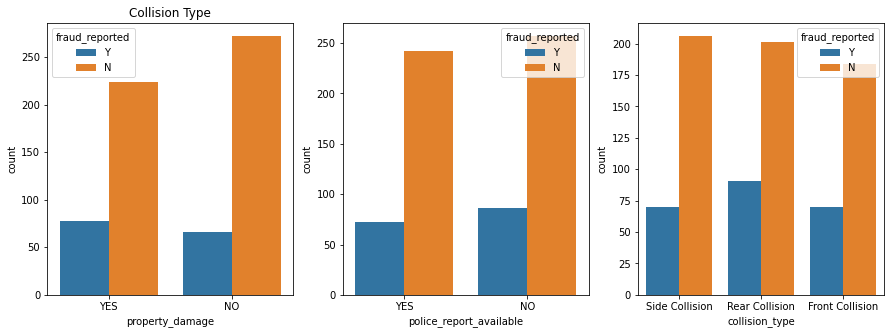

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data.property_damage,hue=data['fraud_reported'], ax=axes[0])
axes[0].set_title('Property Damage')
sns.countplot(data.police_report_available,hue=data['fraud_reported'], ax=axes[1])
axes[0].set_title('Police Report Available')
sns.countplot(data.collision_type,hue=data['fraud_reported'], ax=axes[2])
axes[0].set_title('Collision Type')

In [10]:
for column in data.columns:
    mode_value = data[column].mode().iloc[0]
    data[column] = data[column].replace(np.nan, mode_value)

Text(0.5, 1.0, 'Collision Type')

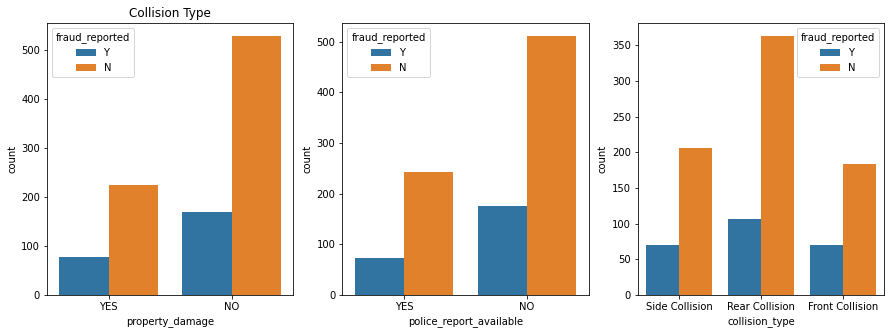

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(data.property_damage,hue=data['fraud_reported'], ax=axes[0])
axes[0].set_title('Property Damage')
sns.countplot(data.police_report_available,hue=data['fraud_reported'], ax=axes[1])
axes[0].set_title('Police Report Available')
sns.countplot(data.collision_type,hue=data['fraud_reported'], ax=axes[2])
axes[0].set_title('Collision Type')

In [12]:
data.duplicated().sum()

0

In [13]:
check_data(data)

,type,amount_unique,unique_values,null_values,percentage_null_values(%)
months_as_customer,int64,391,"[328, 228, 134, 256, 137, 165, 27, 212, 235, 4...",0,0.0
age,int64,46,"[48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...",0,0.0
policy_number,int64,1000,"[521585, 342868, 687698, 227811, 367455, 10459...",0,0.0
policy_bind_date,object,951,"[2014-10-17, 2006-06-27, 2000-09-06, 1990-05-2...",0,0.0
policy_state,object,3,"[OH, IN, IL]",0,0.0
policy_csl,object,3,"[250/500, 100/300, 500/1000]",0,0.0
policy_deductable,int64,3,"[1000, 2000, 500]",0,0.0
policy_annual_premium,float64,991,"[1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...",0,0.0
umbrella_limit,int64,11,"[0, 5000000, 6000000, 4000000, 3000000, 800000...",0,0.0
insured_zip,int64,995,"[466132, 468176, 430632, 608117, 610706, 47845...",0,0.0


**Key takeaways :**
- Dataset that have null/missing values are imputed with the mode value of each feature
- Dataset with no duplicate values

### **Exploratory Data Analysis**

#### **1. Data Overview**
---

In [14]:
# check the numbers of rows and features
data.shape

(1000, 39)

In [15]:
check_data(data)

,type,amount_unique,unique_values,null_values,percentage_null_values(%)
months_as_customer,int64,391,"[328, 228, 134, 256, 137, 165, 27, 212, 235, 4...",0,0.0
age,int64,46,"[48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...",0,0.0
policy_number,int64,1000,"[521585, 342868, 687698, 227811, 367455, 10459...",0,0.0
policy_bind_date,object,951,"[2014-10-17, 2006-06-27, 2000-09-06, 1990-05-2...",0,0.0
policy_state,object,3,"[OH, IN, IL]",0,0.0
policy_csl,object,3,"[250/500, 100/300, 500/1000]",0,0.0
policy_deductable,int64,3,"[1000, 2000, 500]",0,0.0
policy_annual_premium,float64,991,"[1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...",0,0.0
umbrella_limit,int64,11,"[0, 5000000, 6000000, 4000000, 3000000, 800000...",0,0.0
insured_zip,int64,995,"[466132, 468176, 430632, 608117, 610706, 47845...",0,0.0


In [16]:
numeric = []
category = []
for col in data.columns:
  if data[col].dtype != object:
    numeric.append(col)
  elif data[col].dtype == object:
    category.append(col)

print(f'Number of numerical features   :{len(numeric)}')
print(f'Number of categorical features :{len(category)}')

Number of numerical features   :18
Number of categorical features :21


**Key takeaways :**
- Dataset with no null/missing value
- Dataset consists 18 numerical features and 21 categorical features

#### **2. Statistical Summary**
---

In [17]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,203.95,115.11,0.00,115.75,199.5,276.25,479.00
age,1000.0,38.95,9.14,19.00,32.00,38.0,44.00,64.00
policy_number,1000.0,546238.65,257063.01,100804.00,335980.25,533135.0,759099.75,999435.00
policy_deductable,1000.0,1136.00,611.86,500.00,500.00,1000.0,2000.00,2000.00
policy_annual_premium,1000.0,1256.41,244.17,433.33,1089.61,1257.2,1415.70,2047.59
umbrella_limit,1000.0,1101000.00,2297406.60,-1000000.00,0.00,0.0,0.00,10000000.00
insured_zip,1000.0,501214.49,71701.61,430104.00,448404.50,466445.5,603251.00,620962.00
capital-gains,1000.0,25126.10,27872.19,0.00,0.00,0.0,51025.00,100500.00
capital-loss,1000.0,-26793.70,28104.10,-111100.00,-51500.00,-23250.0,0.00,0.00
incident_hour_of_the_day,1000.0,11.64,6.95,0.00,6.00,12.0,17.00,23.00


In [18]:
data[category].describe().T.round(2)

,count,unique,top,freq
policy_bind_date,1000,951,2006-01-01,3
policy_state,1000,3,OH,352
policy_csl,1000,3,250/500,351
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_date,1000,60,2015-02-02,28
incident_type,1000,4,Multi-vehicle Collision,419


Key takeaways:
- Majority of customers **not fraud**

#### **4. Analyzing Feature**
---

##### **1. Target Variable**

Text(0.5, 1.0, 'Percentages of Customer Fraud')

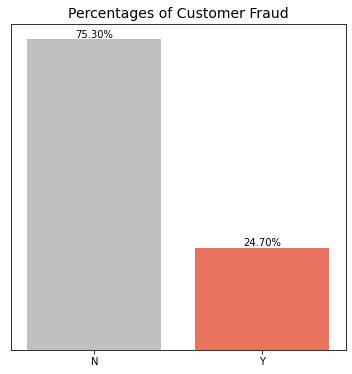

In [19]:
plt.figure(figsize=(6, 6))
counts = data['fraud_reported'].value_counts()
percentages = counts / counts.sum() * 100
ax = sns.barplot(x=counts.index, y=percentages, palette =['silver', 'tomato'])
for i, v in enumerate(percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
ax.set_yticks([])
plt.ylabel('')
plt.title('Percentages of Customer Fraud', fontsize=14)

##### **2. Univariate Analysis**

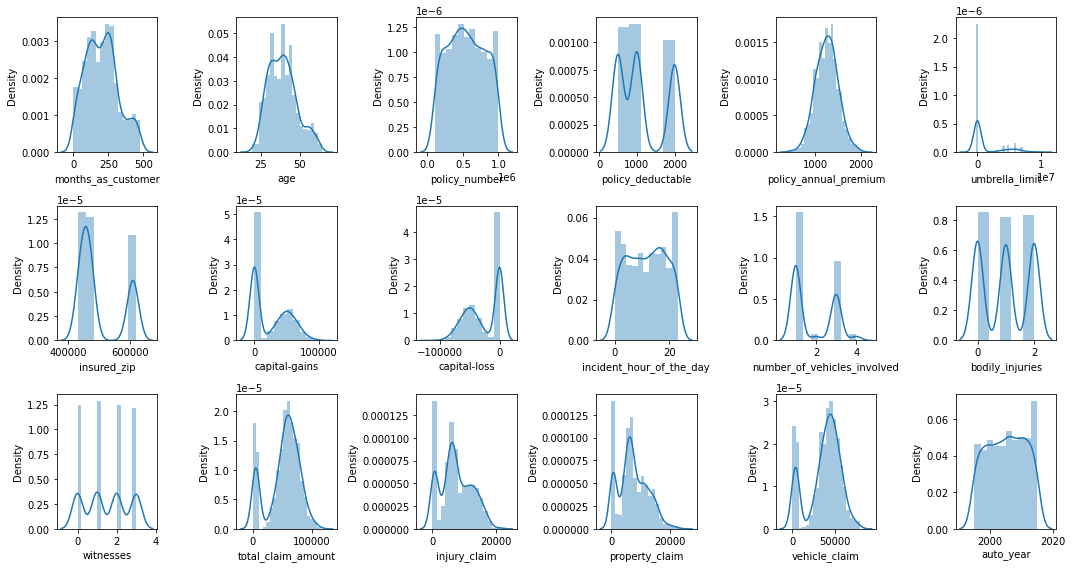

In [20]:
plt.figure(figsize=(15, 8))
for i in range(0, len(numeric)):
    plt.subplot(3, 6, i+1)
    sns.distplot(data[numeric[i]])
    plt.tight_layout()

Key takeaways:
- Overall the data is **not normally distributed**. 
- There is only **one feature** that is **normally distributed** which is `policy_annual_premium` and others tend to have bimodal and multimodal distributions

##### **3. Bivariate Analysis**

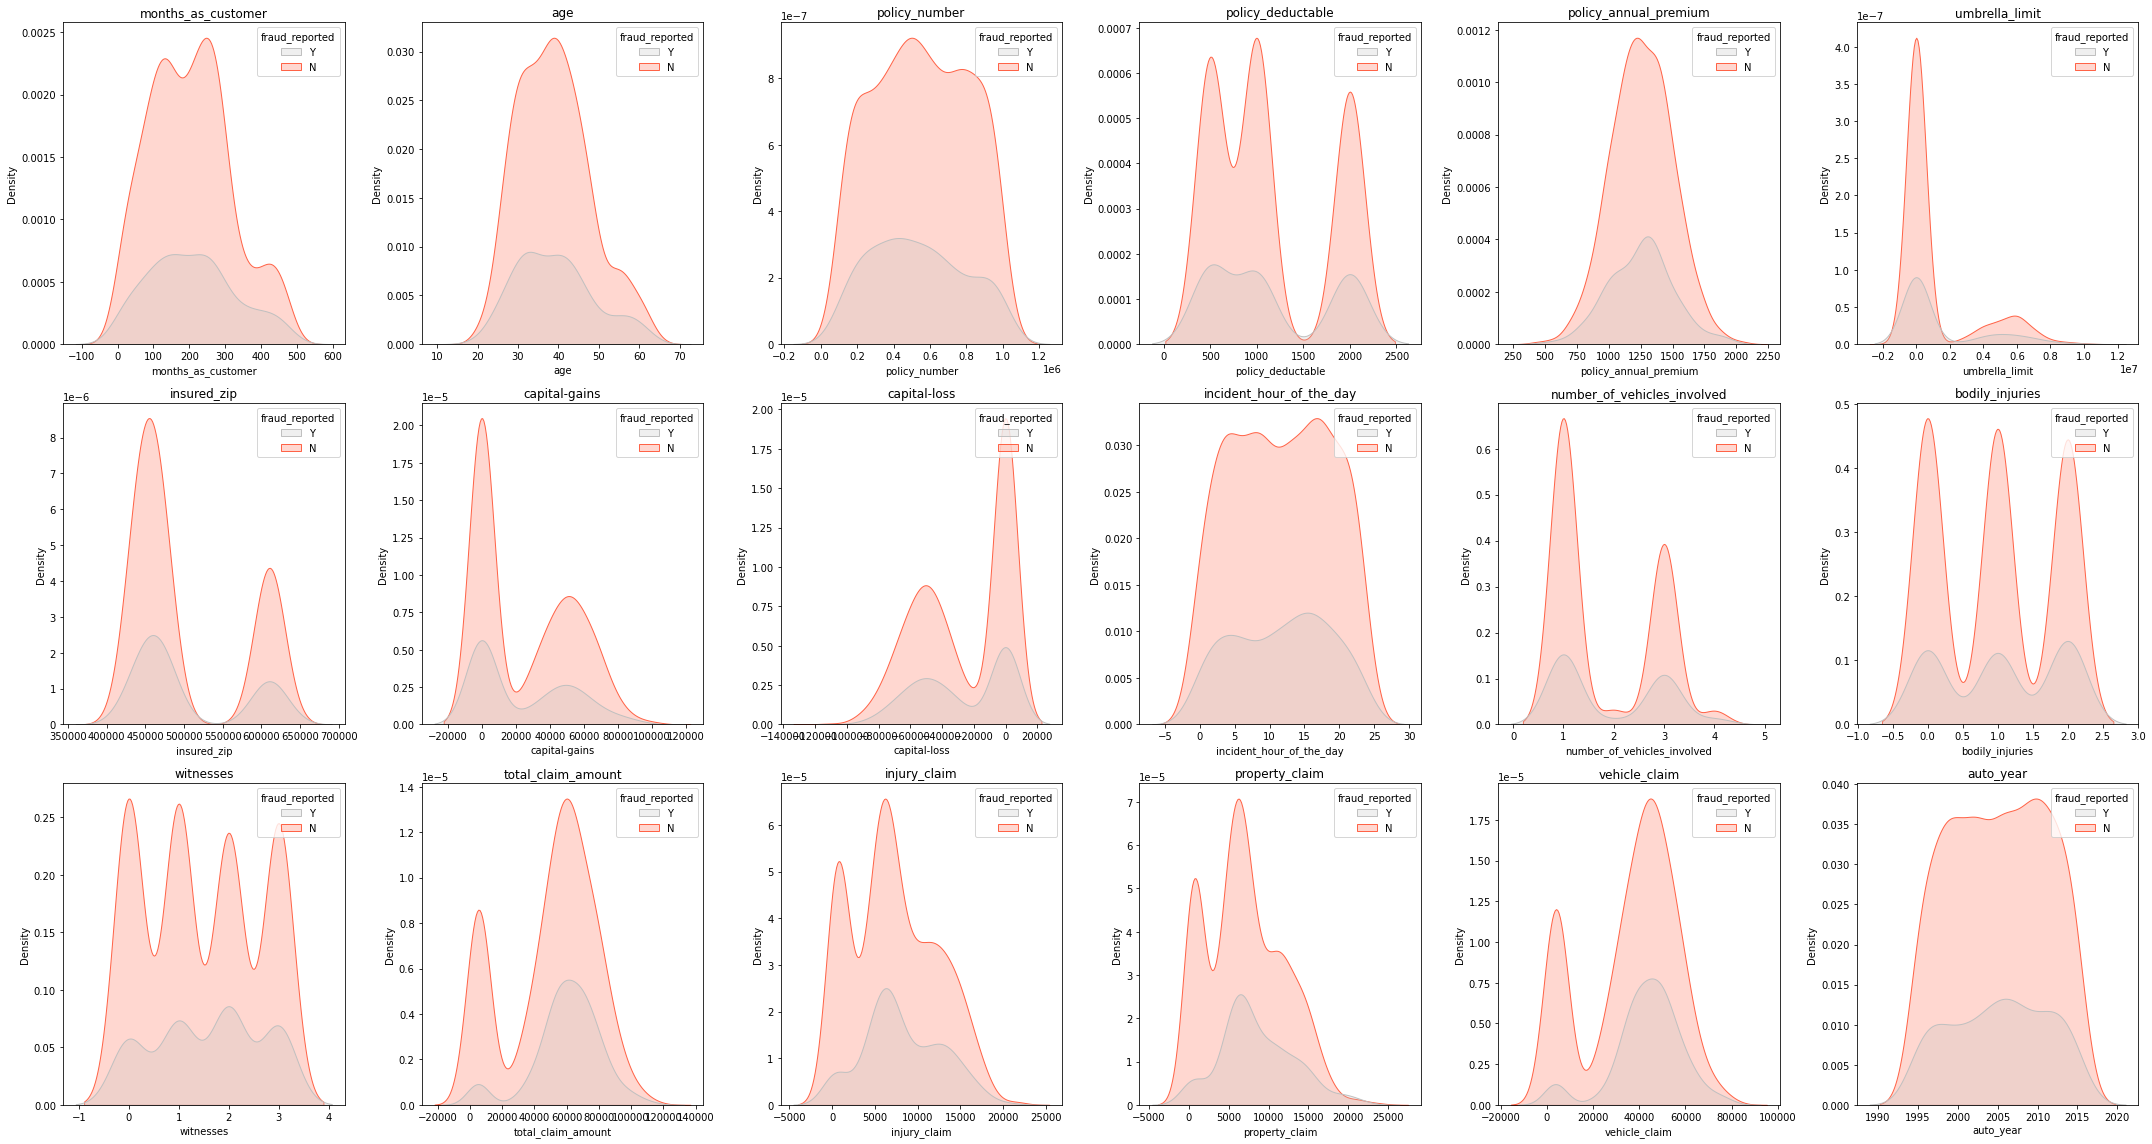

In [21]:
plt.figure(figsize=(30, 16))
for i in range(0, len(numeric)):
    plt.subplot(3, 6, i+1)
    sns.kdeplot(data = data, x = data[numeric[i]], hue=data['fraud_reported'], 
                palette = ['silver', 'tomato'], fill=True).set(title=f'{numeric[i]}')
    plt.tight_layout()

In [22]:
# calculate ratio and pivoting
def ratio_with_target(feats):
    ratio_df = data.groupby([feats,'fraud_reported']).agg({'vehicle_claim':'count'}).reset_index()
    ratio_df['ratio'] = ratio_df.groupby(feats).apply(lambda x: round(x.vehicle_claim/x.vehicle_claim.sum() *100, 0)).values.astype(int)
    ratio_df = ratio_df.pivot_table(index=feats, columns='fraud_reported', values='ratio')
    ratio_df = ratio_df.sort_values(by=['Y'], ascending=False)
    return ratio_df

#---------------------------------------------------------------------------------------------------------

# visualization
def visualization(fitur, title):
    fig, ax = plt.subplots(1,2, figsize=(27,7))
    
    # count
    ax[0].set_title(f'Fraud Reported by {title}\n', fontsize=14)
    sns.countplot(x=fitur, data = data, hue = 'fraud_reported', 
                  palette = ['silver', 'tomato'] , ax=ax[0],
                  order = data[fitur].value_counts('N').index)
    ax[0].bar_label(ax[0].containers[0], fontsize=14) 
    ax[0].bar_label(ax[0].containers[1], fontsize=14)
    ax[0].set_yticks([])
    ax[0].set_xlabel('')
    ax[0].set_ylabel('')
    
    # percentage
    ax[1].set_title(f'Ratio of Fraud Reported by {title}\n', fontsize=14)
    ratio_with_target(fitur).plot(kind='barh', stacked=True, color = ['tomato', 'silver'], ax=ax[1])
    for p in ax[1].patches:
        left, bottom, width, height = p.get_bbox().bounds
        if width != 0:
            ax[1].annotate((str(round(width, 2))+'%'), xy=(left+width/2, bottom+height/2), 
                        ha='center', va='center', fontsize=14)
    plt.legend([])
    ax[1].set_xticks([])
    ax[1].set_xlabel('')
    ax[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

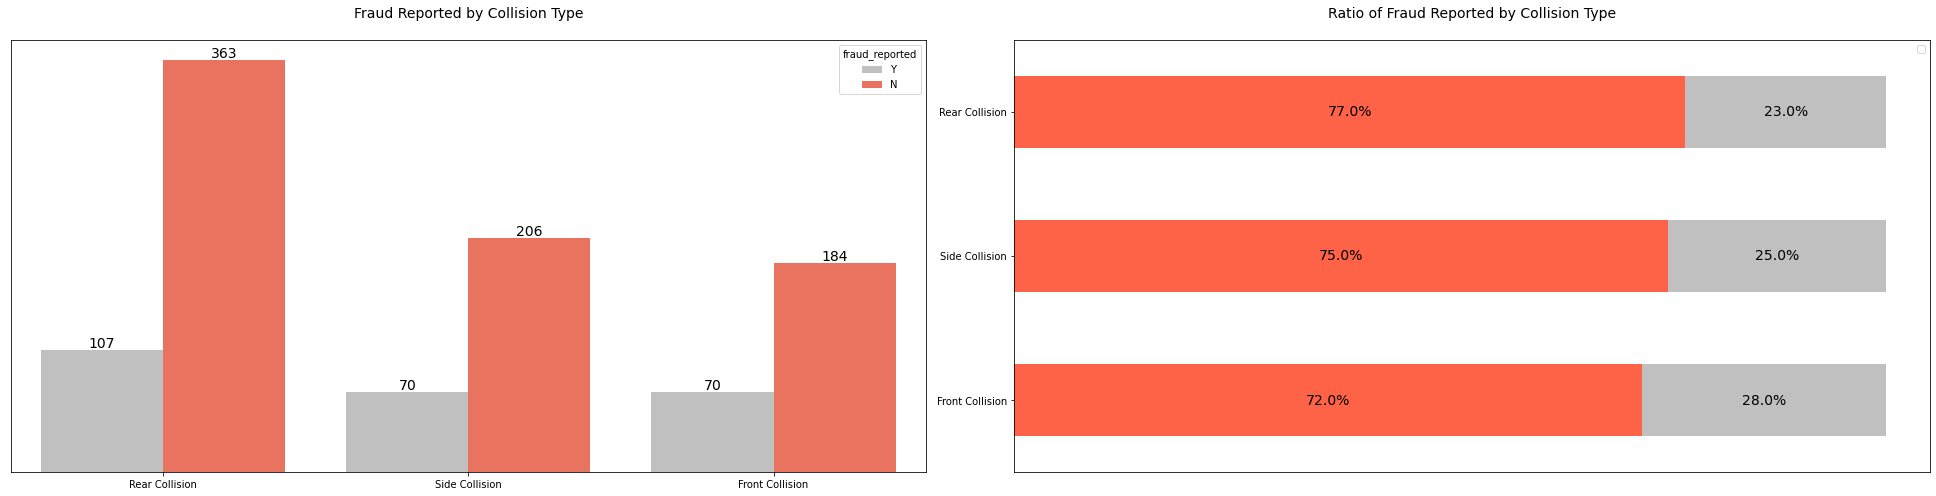

In [23]:
visualization('collision_type', 'Collision Type')

Key takeaways:
- Majority of customers using rear collision type 
- Ratio of fraud customers in each collision type is not much different from 23% - 28%

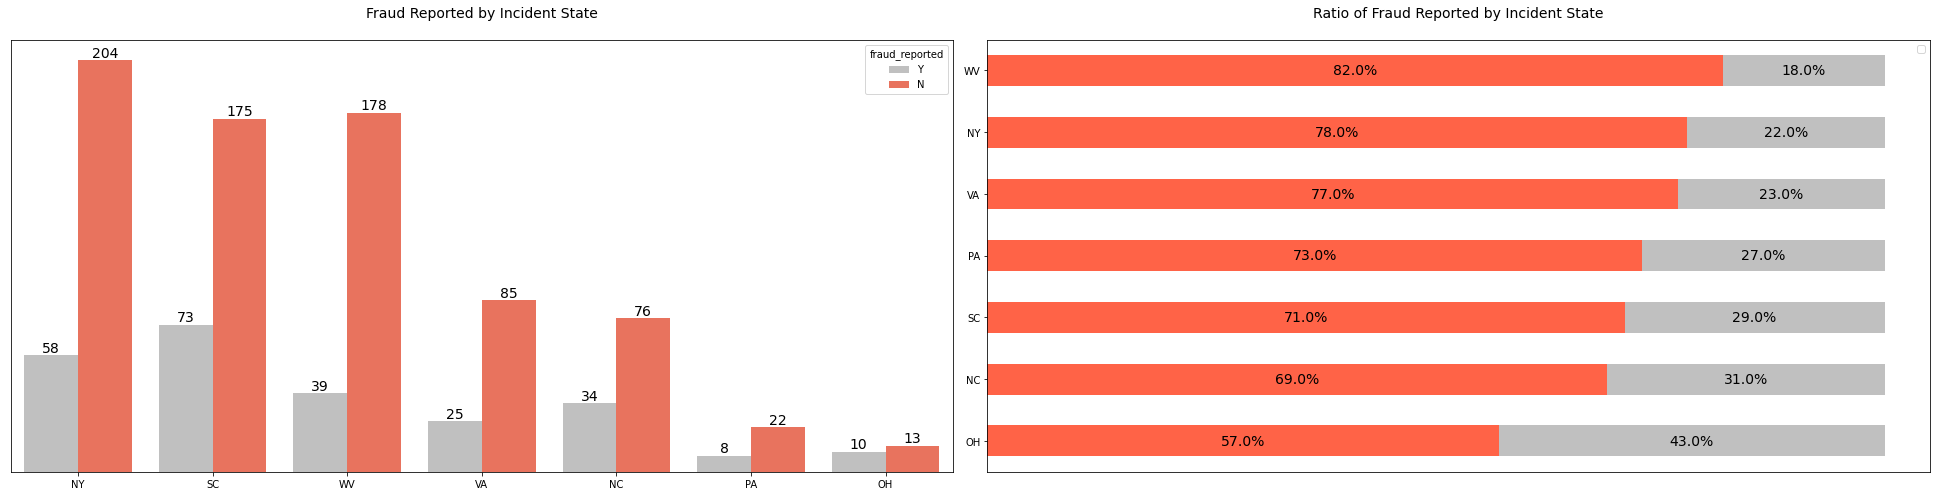

In [24]:
visualization('incident_state', 'Incident State')

Key takeaways:
- Although the number of customers who are in OH is quite low, 43% of them are fraud
- The fraud rate for customers other than in OH is 18% - 31%

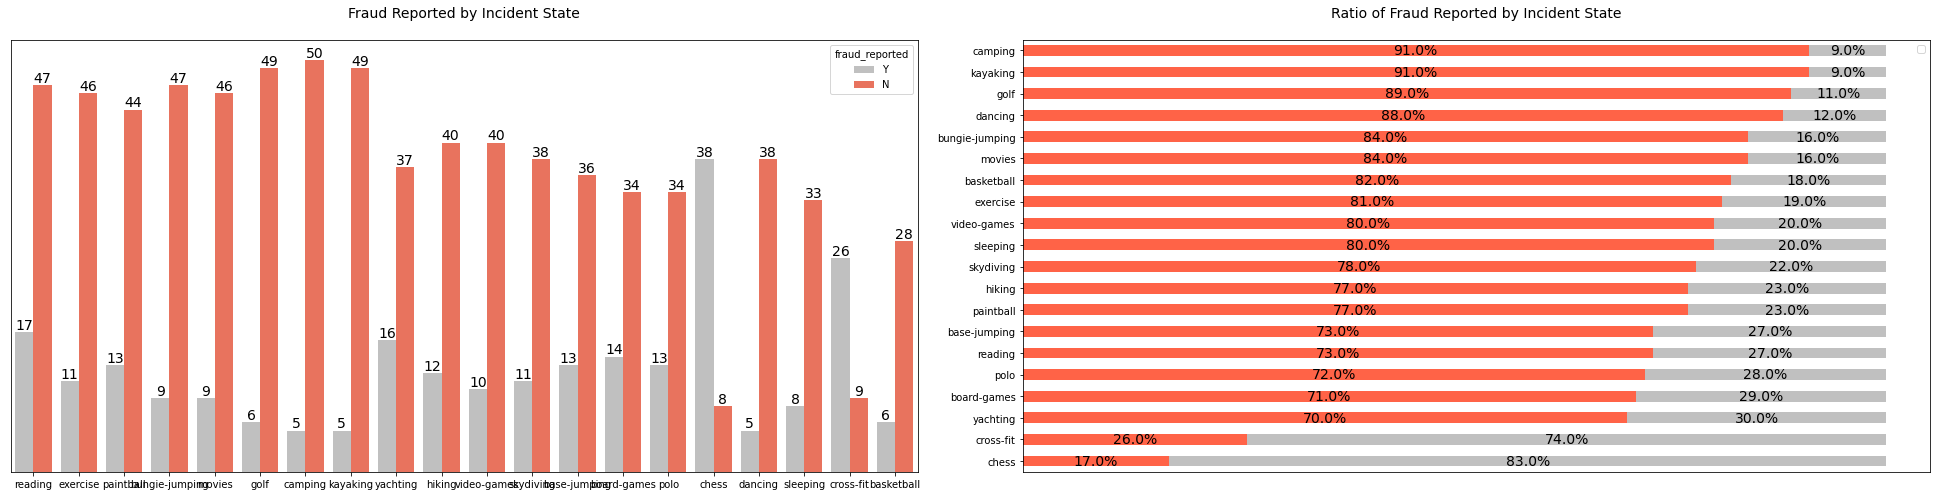

In [25]:
visualization("insured_hobbies", "Incident State")

Key takeaways:
- Similarly, although the number of users who have the hobbies of playing chess and cross-fit is quite low, these hobbies tend to have the highest churn rates of 83% and 74% compared to other hobbies.

##### **4. Multivariate Analysis**

In [26]:
numeric

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

##### **Policy**
---

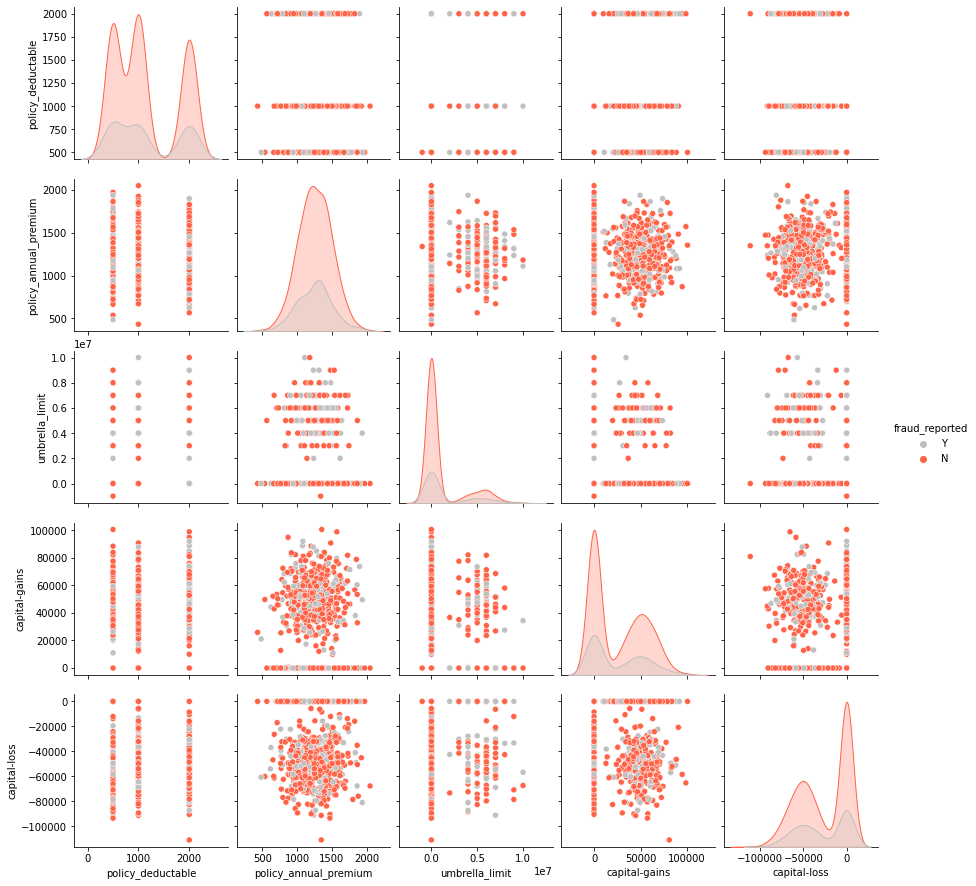

In [27]:
sns.pairplot(data[['policy_deductable', 'policy_annual_premium', 'umbrella_limit',
                   'capital-gains', 'capital-loss', 'fraud_reported']], 
             hue = 'fraud_reported', palette=['silver', 'tomato'])

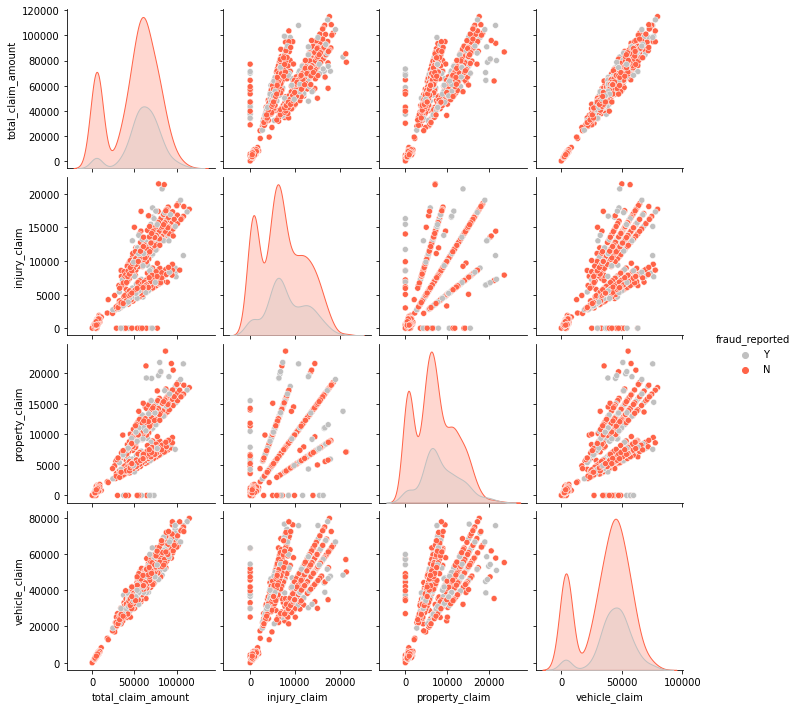

In [28]:
sns.pairplot(data[['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported']], 
             hue = 'fraud_reported', palette=['silver', 'tomato'])

### **Data Preprocessing**

#### **1. Handling Outlier**
---

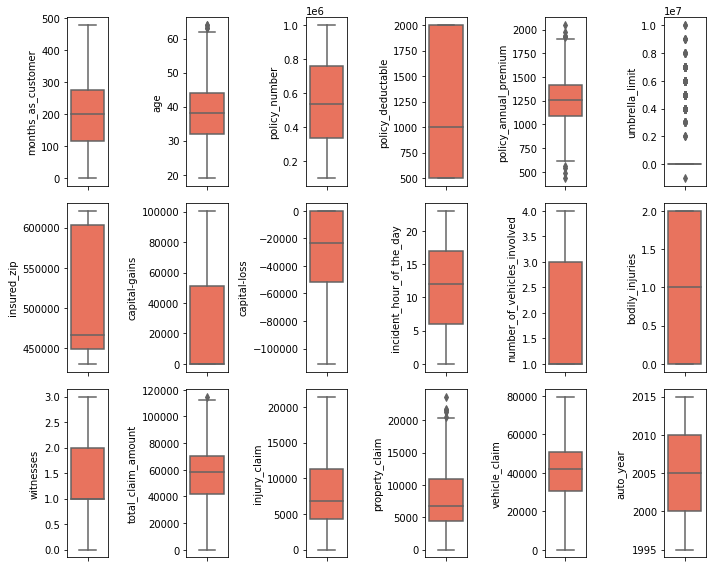

In [29]:
# check outlier
plt.figure(figsize=(10, 8))
for i in range (0,len(numeric)):
  plt.subplot(3, 6, i+1)
  num = numeric[i]
  sns.boxplot(y=data[num], color='tomato')
  plt.tight_layout()

Key takeaways:
- Overall, the data has a few outliers but they are still reasonable (not extreme values or anomalies that are suspected to be errors in data entry).
- Outliers are not handled

#### **2. Feature Encoding**
---

In [30]:
df = data.copy()

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# ----------------------
for col in df.columns:
    if df[col].dtype == 'O':
        df[col] = le.fit_transform(df[col])

In [32]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

#### **3. Feature Selection**
---

In [33]:
to_drop = ['policy_number','policy_bind_date','insured_zip','incident_location',
           'auto_year', 'auto_make', 'auto_model']
df.drop(columns=to_drop, inplace=True)

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

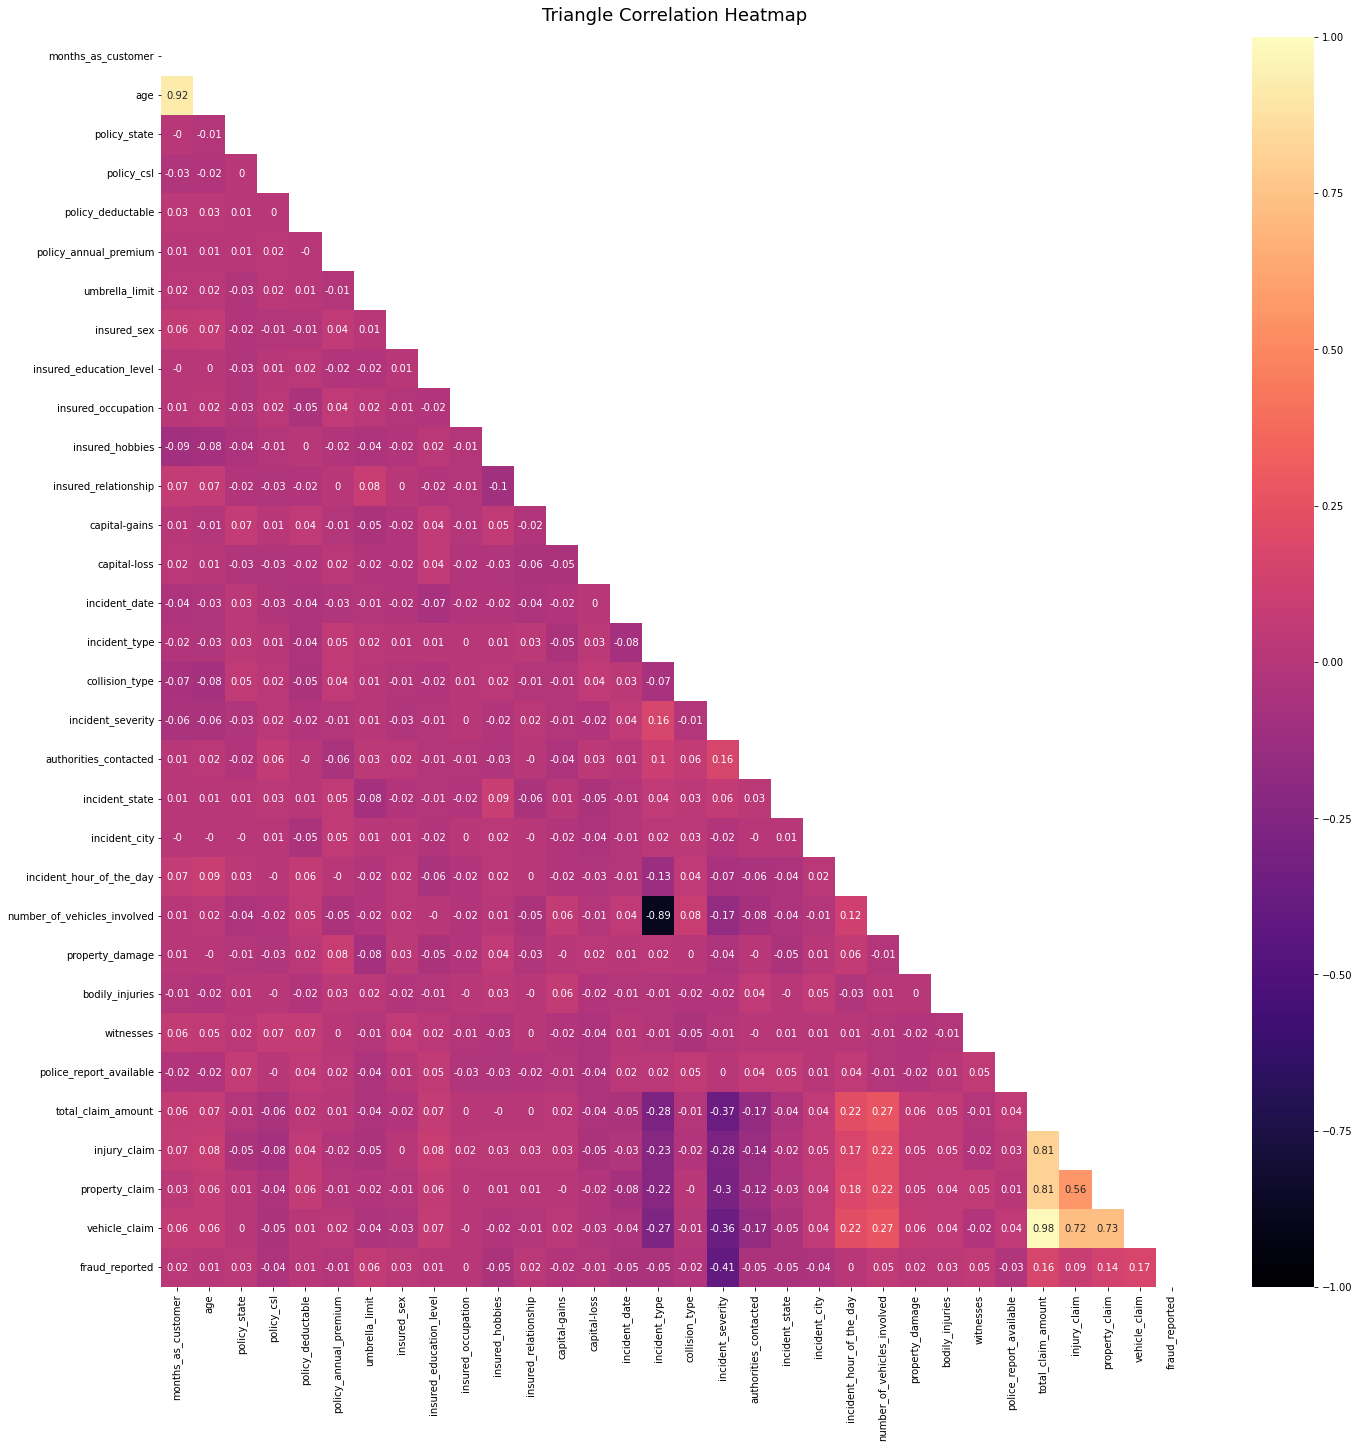

In [34]:
plt.figure(figsize=(23, 23))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix,dtype=np.bool_))
heatmap = sns.heatmap(round(corr_matrix,2), mask=mask, vmin=-1, vmax=1, annot=True, cmap='magma')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

In [35]:
to_drop = ['injury_claim', 'property_claim', 'vehicle_claim', 'incident_type', 'age',
           'incident_hour_of_the_day', 'insured_occupation']
df.drop(columns=to_drop, inplace=True)

In [36]:
df.corr().abs()['fraud_reported'].sort_values(ascending=False)

fraud_reported                 1.000000
incident_severity              0.405988
total_claim_amount             0.163651
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
incident_state                 0.051407
incident_date                  0.050710
witnesses                      0.049497
insured_hobbies                0.046838
authorities_contacted          0.045802
incident_city                  0.040403
policy_csl                     0.037190
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
police_report_available        0.027768
insured_relationship           0.021043
months_as_customer             0.020544
capital-gains                  0.019173
collision_type                 0.017315
property_damage                0.017202
capital-loss                   0.014863
policy_deductable              0.014817
policy_annual_premium          0.014480
insured_education_level        0.008808


[0.0671893  0.01753581 0.01906556 0.01787663 0.06634321 0.02249809
 0.0105471  0.03238238 0.10617095 0.02951646 0.03755921 0.04041285
 0.06452455 0.01650231 0.20502868 0.02606781 0.03257875 0.03306557
 0.01648007 0.00973137 0.0184635  0.02488305 0.00965123 0.07592558]


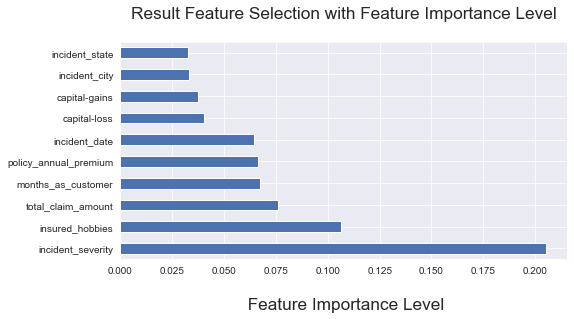

In [37]:
from sklearn.ensemble import RandomForestClassifier
# split features and target
X = df.iloc[:,:-1]              
Y = df['fraud_reported']    

# build model for feature importance
model = RandomForestClassifier(n_estimators=1000)
model.fit(X,Y)

# using feature_importances from tree based classifiers
print(model.feature_importances_) 

# visualize result of features importance level
sns.set({"figure.figsize":(8,4)})
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Result Feature Selection with Feature Importance Level\n", fontsize="xx-large")
plt.xlabel("\n Feature Importance Level", fontsize="xx-large")
plt.show()

In [38]:
final_feat = ["incident_severity","insured_hobbies","total_claim_amount","months_as_customer","policy_annual_premium",
              "incident_date","capital-loss","capital-gains","insured_education_level","incident_city","fraud_reported"]
data_new = df[final_feat]
data_new

,incident_severity,insured_hobbies,total_claim_amount,months_as_customer,policy_annual_premium,incident_date,capital-loss,capital-gains,insured_education_level,incident_city,fraud_reported
0,0,17,71610,328,1406.91,24,0,53300,4,1,1
1,1,15,5070,228,1197.22,20,0,0,4,5,1
2,1,2,34650,134,1413.14,52,0,35100,6,1,0
3,0,2,63400,256,1415.74,9,-62400,48900,6,0,1
4,1,2,6500,228,1583.91,47,-46000,66000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,13,87200,3,1310.80,52,0,0,5,4,0
996,0,17,108480,285,1436.79,23,0,70900,6,3,0
997,1,3,67500,130,1383.49,22,0,35100,5,0,0
998,0,0,46980,458,1356.92,56,0,0,0,0,0


##### **4. Split Train Test**
---

In [39]:
df_model = data_new.copy()
X = df_model.drop(columns='fraud_reported').copy()
y = df_model['fraud_reported'].copy()

In [40]:
from sklearn.model_selection import train_test_split
# ---------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape, X_test.shape)

(700, 10) (300, 10)


In [41]:
y_train.value_counts()

0    519
1    181
Name: fraud_reported, dtype: int64

##### **5. Standardization**
---

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### **Modeling**

In [60]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

def predict(model) :
    # predict label in data testing
    y_pred = model.predict(X_test)
    
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    # model evaluation use classification report
    report = (classification_report(y_test, y_pred))

    # AUC
    rtest = roc_auc_score(y_test, y_pred_proba[:, 1])
    rtrain = roc_auc_score(y_train, y_pred_proba_train[:, 1])
    
    # AUC score
    auc = roc_auc_score(y_test, y_pred)

    print('MODEL EVALUATION :\n', report)
    print('-' * 55, '\n')
    print('AUC Test score:', rtest.round(4))
    print('AUC Train scores:', rtrain.round(4))
    print('-' * 55, '\n')
    c_matrix_viz(model)

# --------------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix
def c_matrix_viz (model) :
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    # set labels for the matrix
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    # visualization
    plt.figure(figsize=(5,3))
    sns.set(font_scale=0.8) # for label size
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm', annot_kws={'size': 12}, 
                yticklabels=['Not Fraud','Fraud'], xticklabels=['Not Fraud','Fraud'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# --------------------------------------------------------------------------------
from sklearn import metrics
def plot_roc(model, X_test, y_test):
    sns.set_theme(style='whitegrid')
    y_pred_proba = model.predict_proba(X_test)

    fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_proba[:, 1])
    
    auc = metrics.auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

##### 1. Logistic Regression
---

In [82]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
lr = LogisticRegression(random_state=42, class_weight='balanced')
lr_model = model_selection.cross_val_score(lr, X, y, cv=kfold, scoring= 'recall')
print('Recall:', lr_model.mean().round(4))
print('Std:', lr_model.std().round(4))

Recall: 0.587
Std: 0.1031


##### Hyperparameter Tuning

In [83]:
params ={'C': [0.1, 1, 10, 100],
         'penalty': ['l1', 'l2'],
         'solver': ['liblinear', 'saga'] }

# -------------------------------------------------------------------------------
model = LogisticRegression(random_state=42)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True,random_state = 42)
grid_search_lr = model_selection.GridSearchCV(model, param_grid = params, scoring = 'recall', cv = kfold)

grid_search_lr.fit(X_train, y_train)
print('Best parameters: ', grid_search_lr.best_params_)

Best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       234
           1       0.57      0.67      0.62        66

    accuracy                           0.82       300
   macro avg       0.74      0.76      0.75       300
weighted avg       0.83      0.82      0.82       300

------------------------------------------------------- 

AUC Test score: 0.7466
AUC Train scores: 0.7954
------------------------------------------------------- 



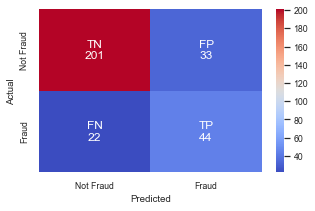

In [84]:
predict(grid_search_lr)

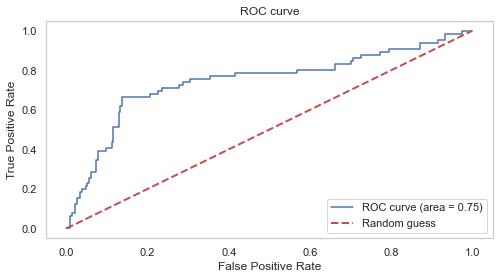

In [85]:
plot_roc(grid_search_lr, X_test, y_test)

##### **2. Random Forest**
---

In [86]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight='balanced')
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
rf_model = model_selection.cross_val_score(rf, X, y, cv=kfold, scoring= 'recall')
print('Recall Mean:', rf_model.mean().round(4))
print('Std:', rf_model.std().round(4))

Recall Mean: 0.5797
Std: 0.1137


##### Hyperparameter Tuning

In [87]:
params ={'criterion' : ['gini', 'entropy'],
         'n_estimators': [100, 200, 300],
         'max_depth': [3, 5, 7, 10],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]}

# -------------------------------------------------------------------------------
model = RandomForestClassifier(random_state=42, class_weight='balanced')
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search_rf = model_selection.GridSearchCV(model, param_grid = params, scoring = 'recall', cv = kfold)

grid_search_rf.fit(X_train, y_train)
print('Best parameters: ', grid_search_rf.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       234
           1       0.59      0.80      0.68        66

    accuracy                           0.83       300
   macro avg       0.76      0.82      0.78       300
weighted avg       0.86      0.83      0.84       300

------------------------------------------------------- 

AUC Test score: 0.8358
AUC Train scores: 0.9791
------------------------------------------------------- 



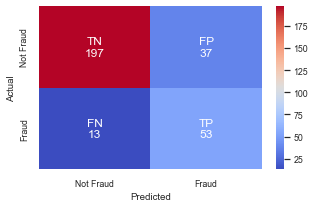

In [89]:
predict(grid_search_rf)

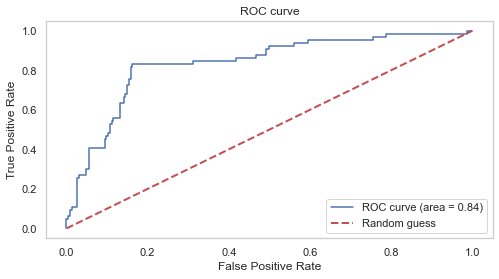

In [90]:
plot_roc(grid_search_rf, X_test, y_test)

##### **3. XGBOOST**
---

In [91]:
from sklearn import model_selection
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
xgb_model = model_selection.cross_val_score(xgb, X, y, cv=kfold, scoring= 'recall')
print('Recall Mean:', xgb_model.mean().round(4))
print('Std:', xgb_model.std().round(4))

Recall Mean: 0.6197
Std: 0.1144


##### Hyperparameter Tuning

In [93]:
params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'n_estimators': [100, 500, 1000],
    'scale_pos_weight': [5, 10, 15] # set the class weight
}

# ----------------------------------------------------------------------
model = XGBClassifier(random_state=42)
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search_xgb = model_selection.GridSearchCV(model, param_grid = params, scoring = 'recall', cv = kfold)

grid_search_xgb.fit(X_train, y_train)
print('Best parameters: ', grid_search_xgb.best_params_)

Best parameters:  {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 15}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.95      0.47      0.63       234
           1       0.33      0.91      0.48        66

    accuracy                           0.57       300
   macro avg       0.64      0.69      0.56       300
weighted avg       0.81      0.57      0.60       300

------------------------------------------------------- 

AUC Test score: 0.8538
AUC Train scores: 0.9106
------------------------------------------------------- 



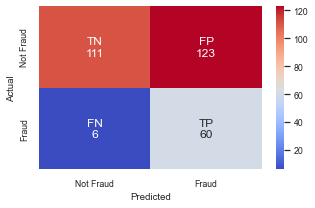

In [95]:
predict(grid_search_xgb)

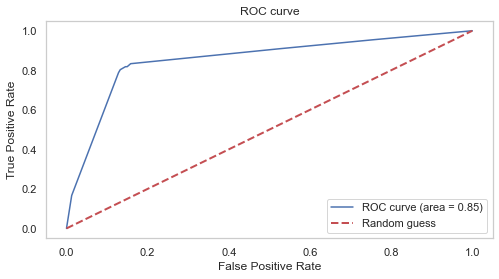

In [94]:
plot_roc(grid_search_xgb, X_test, y_test)

##### **4. K-Nearest Neighbor**
---

In [96]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights='distance')
kfold = model_selection.KFold(n_splits=10,shuffle = True, random_state=42)
knn_model = model_selection.cross_val_score(knn, X, y, cv=kfold, scoring= 'recall')
print('Recall Mean:', knn_model.mean().round(4))
print('Std:', knn_model.std().round(4))

Recall Mean: 0.1191
Std: 0.055


##### Hyperparameter Tuning

In [97]:
params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 1.5, 2]
}

# ----------------------------------------------------------------------
model = KNeighborsClassifier()
kfold = model_selection.StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
grid_search_knn = model_selection.GridSearchCV(model, param_grid = params, scoring = 'recall', cv = kfold)

grid_search_knn.fit(X_train, y_train)
print('Best parameters: ', grid_search_knn.best_params_)

Best parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


MODEL EVALUATION :
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       234
           1       0.48      0.42      0.45        66

    accuracy                           0.77       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.76      0.77      0.77       300

------------------------------------------------------- 

AUC Test score: 0.7071
AUC Train scores: 0.9175
------------------------------------------------------- 



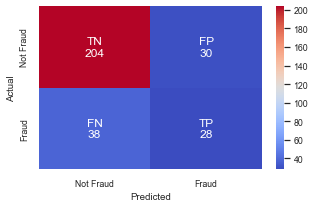

In [98]:
predict(grid_search_knn)

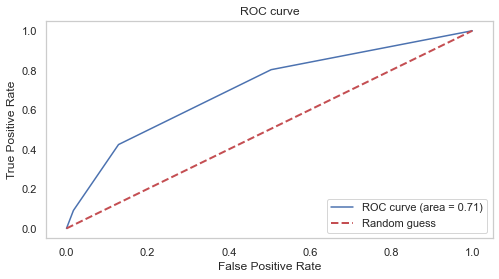

In [99]:
plot_roc(grid_search_knn, X_test, y_test)

#### **Models Comparison**

In [100]:
models = pd.DataFrame({
    'Model' : ['KNN', 'Random Forest', 'XgBoost', 'Logistic Regression'],
    'Accuracy' : [0.77,0.83,0.57,0.82],
    'Recall' : [(0.87 + 0.42)/2,(0.84+0.8)/2,(0.47+0.91)/2,(0.86 + 0.67)/2],
    'F1-Score' : [(0.86 + 0.45)/2,(0.89+0.68)/2,(0.63+0.48)/2,(0.88 + 0.62)/2],
    'AUC' : [0.7071,0.8358,0.8538,0.7466]
})


models.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy,Recall,F1-Score,AUC
1,Random Forest,0.83,0.820,0.785,0.8358
3,Logistic Regression,0.82,0.765,0.750,0.7466
0,KNN,0.77,0.645,0.655,0.7071
2,XgBoost,0.57,0.690,0.555,0.8538


In [104]:
import plotly.express as px
px.bar(data_frame = round(models.sort_values(by = 'Accuracy', ascending = False),2), x = 'Accuracy', y = 'Model', color = 'Recall', template = 'plotly_dark', 
       title = 'Models Comparison')